In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from web3 import Web3, IPCProvider
%matplotlib inline
from scipy import stats
import powerlaw
import networkx as nx

In [2]:
genesis = pd.read_csv('genesisLevel.csv')
genesis1 = pd.read_csv('genesisLevel_1.csv')
genesisLvl = genesis.append(genesis1, ignore_index=True)
genesisBal = pd.read_csv('balancesLvl.csv')
genesisBal.balance = genesisBal.balance.astype(float)
# transactions = pd.read_csv('../all_transactions.csv', low_memory=False)

In [3]:
#Basic Statistics
ft = open('stats_Levels.csv','a')
ft.write('Median: %f' %np.median(genesisLvl.level))
ft.write('\n')
ft.write(str(stats.mode(list(genesisLvl.level))))
desc=stats.describe(list(genesisLvl.level))
ft.write('\n')
ft.write(str(desc))
ft.write('\n')
ft.write('Standard Variance: %f' %np.var(genesisLvl.level))
var=np.var(list(genesisLvl.level))
std=np.sqrt(var)
ft.write('\n')
ft.write('Standard Deviation: %f' %std)
ft.close()

In [19]:
#get the sum of balances per level and the number of addresses contained
Nl = max(genesisBal.level) #number of levels
cumulativeBal = pd.DataFrame(np.zeros((Nl,4)), columns=['level','balance','count', 'average'])

for i in range(Nl):
    bsum = np.sum(genesisBal.balance[genesisBal.level == i])
    count = np.count_nonzero(genesisBal.address[genesisBal.level == i])
    cumulativeBal.iloc[i,:] = [i, bsum, count, bsum/count]
cumulativeBal.head()

/home/lreintgen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


,level,balance,count,average
0,0.0,0.000000e+00,0.0,NaN
1,1.0,8.850102e+24,12969.0,6.824044e+20
2,2.0,1.386212e+25,724647.0,1.912948e+19
3,3.0,2.900421e+25,3563436.0,8.139393e+18
4,4.0,3.185501e+25,5643141.0,5.644908e+18


In [25]:
#Basic Statistics for the balances
ft = open('stats_Balances.csv','a')
ft.write('Median Balance: %f' %np.median(cumulativeBal.balance))
ft.write(', Median Adress Count: %f' %np.median(cumulativeBal['count']))
ft.write('\n')
ft.write(str(stats.mode(list(cumulativeBal.balance))))
desc=stats.describe(list(cumulativeBal.balance))
ft.write('\n')
ft.write('Description of the Balances: ')
ft.write(str(desc))
ft.write('\n')
desc2 = stats.describe(list(cumulativeBal['count']))
ft.write('Description of the Adress count: ')
ft.write(str(desc2))
ft.write('\n')
ft.write('Standard Variance: %f' %np.var(cumulativeBal.balance))
var=np.var(list(cumulativeBal.balance))
std=np.sqrt(var)
ft.write('\n')
ft.write('Standard Deviation: %f' %std)
ft.close()

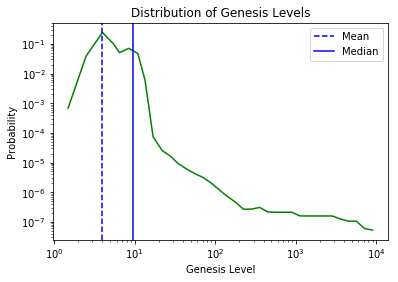

In [5]:
#Distribution of the addresses onto the levels
levels = list(genesisLvl.level)
mean = np.mean(levels)
median = np.median(levels)

fig0 = powerlaw.plot_pdf(levels, color='g', label = 'Probability Density Function')

fig0.axvline(label='Mean',x=mean,linestyle='solid', color ='blue')
fig0.axvline(label='Median',x=median,linestyle='dashed',color ='blue')

fig0.set_xlabel('Genesis Level')
fig0.set_ylabel('Probability')
fig0.set(title='Distribution of Genesis Levels')

median_line=mlines.Line2D([], [], color='blue', label='Median')
mean_line=mlines.Line2D([], [], color='blue', linestyle = 'dashed', label='Mean')


fig0.legend(handles=[mean_line,median_line], loc='upper right')
plt.savefig('levelDistr.png') #use .pgf to include the figure into latex document

In [ ]:
#Average per-wallet balance sorted by level (skeletal, not tested yet)

#table containing the address with its balance and genesis Level
genesisLvlBal = genesisLvl.set_index('address').join(genesisBal.set_index('adress')) 
#get the cumulative balance per level
for line in genesisLvlBal.iteritems():
    levelSum[line[1]] = levelSum[line[1]] + levelSum[line[2]]  #todo check the correctness of the indices
#normalize the summed balance by the number of wallets 
for i in range (0,len(levelSum)):
    levelSum[i] = levelSum[i] / walletCount[i] 

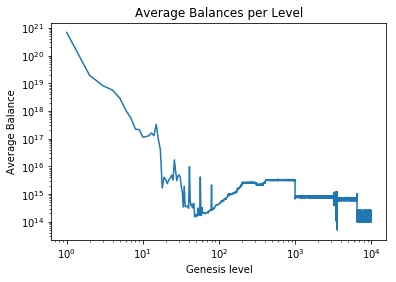

In [100]:
#plot the average balance
balance = cumulativeBal.average[1:]

plt.loglog(cumulativeBal.average)

plt.xlabel('Genesis level')
plt.ylabel('Average Balance')

plt.title('Average Balances per Level')
plt.savefig('avgBalance_loglog.pgf') 
plt.show()


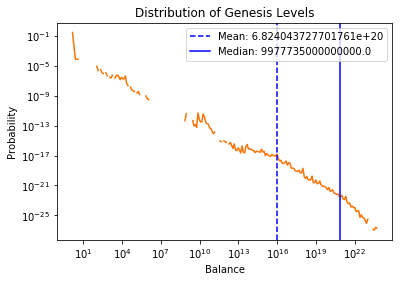

9977735000000000.0


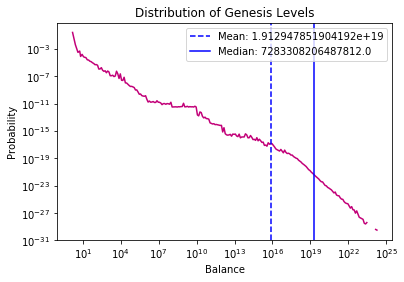

7283308206487812.0


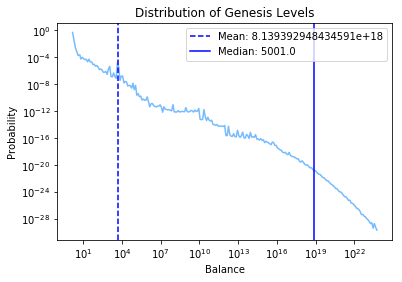

5001.0


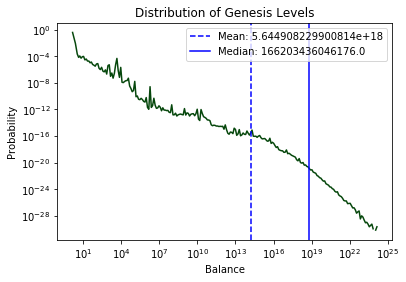

166203436046176.0


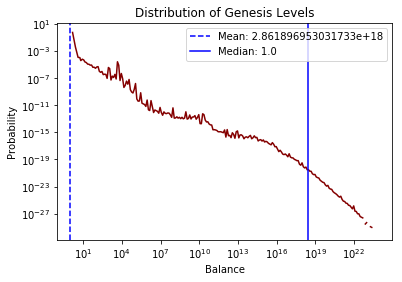

1.0


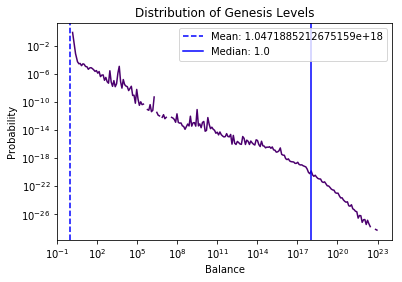

1.0


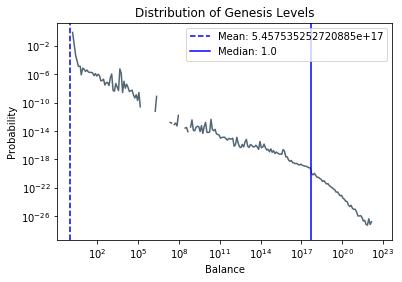

1.0


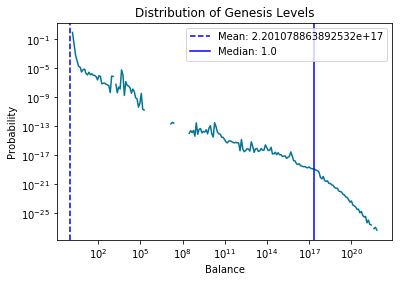

1.0


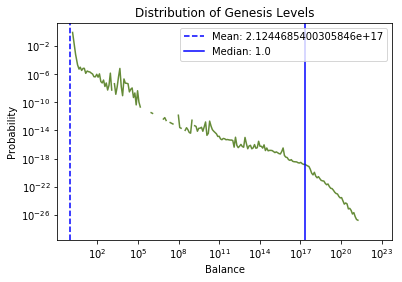

1.0


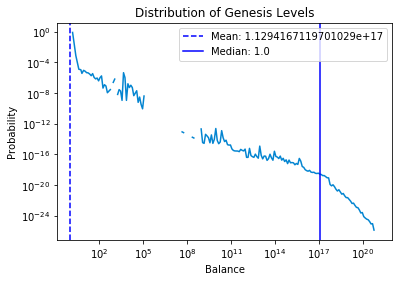

1.0


In [105]:
# for the first 10 levels plot the balance distribution
colorSet = ['xkcd:teal','xkcd:orange','xkcd:magenta','xkcd:sky blue', 'xkcd:forest green','xkcd:dark red','xkcd:royal purple','xkcd:slate','xkcd:sea blue','xkcd:moss green','xkcd:cerulean','xkcd:burnt sienna', 'xkcd:pinkish red']
# fig, ax = plt.subplots(2,5, figsize = (10,5))

for i in range(1,11):
    dist = genesisBal.balance[genesisBal.level == i] +1 #add one to prevent error in pdf plot
    mean = np.mean(dist)
    median = np.median(dist)
    
    fig = powerlaw.plot_pdf(dist, color = colorSet[i])
    fig.set_title("Probability distribution for the balance in level {}".format(i))
    fig.set_xbound(upper = 1)
    
    fig.axvline(label='Mean',x=mean,linestyle='solid', color ='blue')
    fig.axvline(label='Median',x=median,linestyle='dashed',color ='blue')

    fig.set_xlabel('Balance')
    fig.set_ylabel('Probability')
    fig.set(title='Distribution of Genesis Levels')

    median_line=mlines.Line2D([], [], color='blue', label='Median: {}'.format(median))
    mean_line=mlines.Line2D([], [], color='blue', linestyle = 'dashed', label='Mean: {}'.format(mean))


    fig.legend(handles=[mean_line,median_line], loc='upper right')
    plt.savefig("balances{}.png".format(i))
    plt.show()
    

# fig3,ax3 = plt.subplots(1, 4, figsize=(10,5))
# ax3[0].bar(df1.index,df1['or_m']) 
# ax3[1].bar(df1.index,df1['filt_m'],alpha = 0.7)
# ax3[2].bar(df1.index,df1['or_md'], color = 'orange')
# ax3[3].bar(df1.index,df1['filt_md'], color = 'orange',alpha = 0.7)

In [7]:
#What are the distances between the levels within a specific transaction
df = transactions.drop(['Value','Time','Block'],axis=1) 

lvlDict ={}
for line in genesisLvl.itertuples():
    addr = line[1]
    lvlDict[addr] = line[2]
lvlDict['ethereum'] = 0
dist = []
dist_nonEthr = []
fails = []

for line in df.itertuples():
    fromAdr = line[1]
    toAdr = line[2]
    try:
        diff = np.abs(lvlDict[fromAdr] - lvlDict[toAdr])
        dist.insert(line[0],diff)
        if fromAdr != 'ethereum':
            dist_nonEthr.insert(line[0],diff)
    except:
        fails.append(fromAdr)

print(len(fails))
print(len(dist))
print(len(dist_nonEthr))

68
143836
26560


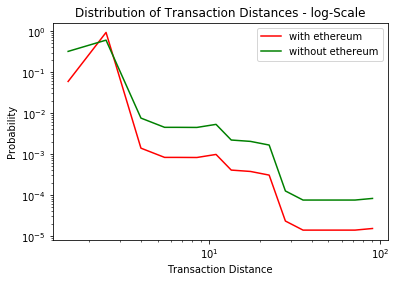

In [29]:
mean = np.mean(dist)
median = np.median(dist_nonEthr)
distances = [i+1 for i in dist ]
distances2 = [i+1 for i in dist_nonEthr ] # otherwise pdf will output error for zero

fig, ax = plt.subplots()

ax = powerlaw.plot_pdf(distances, color='r', label = 'with ethereum')
line2 = powerlaw.plot_pdf(distances2, color='g', label = 'without ethereum')

#fig0 = powerlaw.plot_pdf(distances, color='g', label = 'Probability Density Function')

# ax.axvline(label='Mean1: '+str(mean),x=mean,linestyle='dashed', color ='r')
# ax.axvline(label='Mean2: '+str(mean2),x=mean,linestyle='dashed', color ='g')

ax.set_xlabel('Transaction Distance')
ax.set_ylabel('Probability')
ax.set(title='Distribution of Transaction Distances - log-Scale')
# fig0.set(title='Distribution of Transaction Distances - linear x-Scale')


#fig0.set_xscale('linear')
# fig1.set_yscale('linear')

ax.legend()
#plt.show()
plt.savefig('distDistr.pgf') #use .pgf to include the figure into latex document

In [45]:
ft = open('stats_transactionDistances.csv','a')
desc = stats.describe(dist)
ft.write(str(desc))
ft.write('\n')
ft.close()
    

In [ ]:
# plot the degree distribution according to the genesis level

In [ ]:
#get the maximum path length by level

G = nx.diGraph()
G.add_nodes_from(range(1,Nl))

for trans in transactions.itertuples:
    flevel = lvlDict[trans(1)]
    tlevel = lvlDict[trans(2)]
    if ((flevel, tlevel) in G.edges):
        G.edges[flevel,tlevel]['weight'] += 1
    else:
        G.add_edge(flevel, tlevel, 1)

nx.draw_spring(G)
    